The S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchange in the United States.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/S&P500/'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

data = pd.DataFrame()
for i in company_list:
  current_df = pd.read_csv(path + i)
  data = pd.concat([data, current_df])

In [ ]:
data.head()

1. date: The date for each trading day. This column records the specific day the stock prices were recorded (e.g., 2013-02-08, 2013-02-11, etc.).

2. open: The opening price of the stock on that day. This is the price at which the stock started trading when the market opened on a specific day (e.g., 67.7142 on 2013-02-08).

3. high: The highest price the stock reached during the trading day. This represents the peak price the stock traded at throughout the day (e.g., 68.4014 on 2013-02-08).

4. low: The lowest price the stock reached during the trading day. This shows the lowest price the stock fell to on that particular day (e.g., 66.8928 on 2013-02-08).

5. close: The closing price of the stock on that day. This is the final price at which the stock was traded when the market closed (e.g., 67.8542 on 2013-02-08).

6. volume: The number of shares traded during the day. This gives the total amount of the company’s stock traded on the day (e.g., 158168416 shares on 2013-02-08).

Name: The ticker symbol for the company. In this case, it’s AAPL, which represents Apple Inc. Each row corresponds to data for this particular stock.

In [ ]:
data.dtypes

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.columns

Analyze the closing price of all stocks

In [ ]:
tech_list = data['Name'].unique()
tech_list

In [ ]:
plt.figure(figsize=(15, 7))
for i, company in enumerate(tech_list, 1):
  plt.subplot(2,2,i)
  df = data[data['Name'] == company]
  plt.plot(df['date'], df['close'])
  plt.title(f"Closing Price of {company}")


Analyze the total volume of stock for each day

In [ ]:
plt.figure(figsize=(15, 7))
for i, company in enumerate(tech_list, 1):
  plt.subplot(2,2,i)
  df = data[data['Name'] == company]
  plt.plot(df['date'], df['volume'])
  plt.title(f"Volume Price of {company}")

Analyse Daily price change in stock

To calculate the daily price change subtract opening from closing stock

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/S&P500/AAPL_data.csv')
df.head()

In [ ]:
df['% return for 1 day'] = (df['close'] - df['open']) / df['close'] * 100
df.head()

In [ ]:
plt.figure(figsize=(10,6))
df['% return for 1 day'].plot()

In [ ]:
import plotly.express as px
fig = px.line(df, x="date", y="% return for 1 day", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

In [ ]:
df.set_index('date')['2016-01-01':'2016-03-31']['% return for 1 day'].plot()
plt.xticks(rotation='vertical')

Analyze the monthly mean of close column

In [ ]:
df2 = df.copy()
df2.dtypes

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

In [ ]:
df2.set_index('date', inplace=True)

In [ ]:
df2.head()

In [ ]:
df2['close'].resample('M').mean().plot() #monthly

In [ ]:
df2['close'].resample('Y').mean().plot()


Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [ ]:
apple_df = pd.read_csv('/content/drive/MyDrive/S&P500/AAPL_data.csv')

In [ ]:
google_df = pd.read_csv('/content/drive/MyDrive/S&P500/GOOG_data.csv')

In [ ]:
amazon_df = pd.read_csv('/content/drive/MyDrive/S&P500/AMZN_data.csv')

In [ ]:
microsoft_df = pd.read_csv('/content/drive/MyDrive/S&P500/MSFT_data.csv')

In [ ]:
### create a blank dataframe
close=pd.DataFrame()

In [ ]:
close['apple']=apple_df['close']
close['google']=google_df['close']
close['Amazon']=amazon_df['close']
close['Microsoft']=microsoft_df['close']

In [ ]:
close.head()

### Multivariate Analysis

In [ ]:
sns.pairplot(data=close)

In [ ]:
sns.heatmap(close.corr(),annot=True,cmap='gray_r',linecolor="black")

In [ ]:
data=pd.DataFrame()

In [ ]:
data['apple_change']=((apple_df['close']-apple_df['open'])/apple_df['close'])*100
data['google_change']=((google_df['close']-google_df['open'])/google_df['close'])*100
data['Amazon_change']=((amazon_df['close']-amazon_df['open'])/amazon_df['close'])*100
data['Microsoft_change']=((microsoft_df['close']-microsoft_df['open'])/microsoft_df['close'])*100

In [ ]:
data.head()

In [ ]:
sns.pairplot(data=data)

<Axes: >

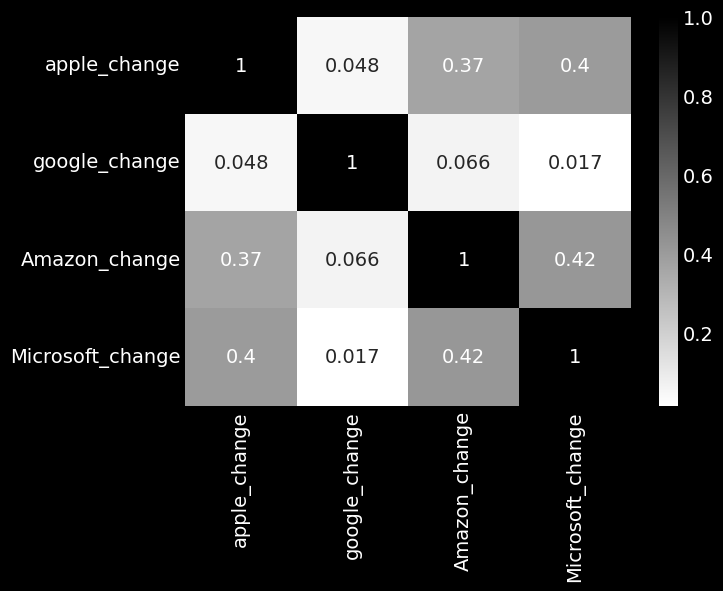

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='gray_r',linecolor="black")

You are a Data Scientist at an investment management company. The firm is interested in analyzing the performance of S&P 500 stocks over the past 10 years to help the portfolio managers make informed decisions about stock allocation. They want insights into how specific sectors have performed, the volatility of individual stocks, and how external factors like economic indicators have influenced stock performance. Your goal is to analyze and visualize the historical stock data to find trends and provide actionable insights for the portfolio management team. provide me with a detailed solution on how I would solve this?

In [ ]:
!pip install yfinance pandas_datareader seaborn matplotlib pandas numpy statsmodels


In [ ]:
import yfinance as yf
import pandas as pd

# Define a list of S&P 500 tickers (for simplicity, we'll use a subset here)
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']  # Add more tickers for a comprehensive analysis

# Download historical stock data for the past 10 years
stock_data = yf.download(tickers, start='2013-01-01', end='2023-01-01')

# Show a preview of the data
print(stock_data.head())

[*********************100%***********************]  4 of 4 completed

Price                      Adj Close                                 \
Ticker                          AAPL     AMZN       GOOG       MSFT   
Date                                                                  
2013-01-02 00:00:00+00:00  16.705696  12.8655  17.969599  22.451807   
2013-01-03 00:00:00+00:00  16.494833  12.9240  17.980036  22.151043   
2013-01-04 00:00:00+00:00  16.035383  12.9575  18.335327  21.736477   
2013-01-07 00:00:00+00:00  15.941054  13.4230  18.255325  21.695833   
2013-01-08 00:00:00+00:00  15.983955  13.3190  18.219299  21.582027   

Price                          Close                                 \
Ticker                          AAPL     AMZN       GOOG       MSFT   
Date                                                                  
2013-01-02 00:00:00+00:00  19.608213  12.8655  18.013729  27.620001   
2013-01-03 00:00:00+00:00  19.360714  12.9240  18.024191  27.250000   
2013-01-04 00:00:00+00:00  18.821428  12.9575  18.380356  26.740000   
2013-


Close: The close price is the price at which a stock or asset last traded on a particular day when the market closes.
What It Represents: This is the raw closing price, and it reflects the final price at which the stock was traded on that day, without any adjustments for dividends, stock splits, or other corporate actions.


Adj close: The adj close (adjusted close) price is the closing price that has been adjusted for any corporate actions, such as dividends, stock splits, or new stock offerings.
What It Represents: It represents the true value of the stock after accounting for dividends, stock splits, and other adjustments. This adjustment is crucial for accurate historical performance analysis.


Why Use Adj Close Over Close?
Adjusted Close is preferred when analyzing historical stock performance because it gives you a true comparison of a stock’s value over time. If a company issues dividends or does a stock split, the adj close price adjusts to reflect those changes, ensuring that historical prices are consistent for proper return calculations.
Example: Stock Split
If a company undergoes a 2-for-1 stock split, the close price will show a sudden drop on the split date because each share is now worth half as much. However, the adj close price adjusts the prices before the split to reflect the new share count, giving a clearer picture of the stock's value over time.

Example: Dividend Payment
If a company issues a dividend, the adj close will reflect the price adjusted for this dividend payment, ensuring you get an accurate representation of the stock’s value, which the raw close price won’t account for.



In [ ]:
#Macroeconomic data acquistion - fetch these indicators like GDP grpwth and interest rates
import pandas_datareader.data as web
import datetime

#Set start and end dates for the data
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2023, 1, 1)

#Fetch economic data GDP growth data, interest rates from FRED
gdp_data = web.DataReader('GDP', 'fred', start, end)
interest_rate_date = web.DataReader('DGS10', 'fred', start,end) #10 year Treasury constant maturity rate

# Merge economic data into a single DataFrame
macro_data = pd.concat([gdp_data, interest_rate_date], axis=1)
macro_data.columns = ['GDP', 'interest_rate']

macro_data.head()


,GDP,interest_rate
DATE,,
2013-01-01,16648.189,NaN
2013-01-02,NaN,1.86
2013-01-03,NaN,1.92
2013-01-04,NaN,1.93
2013-01-07,NaN,1.92


In [ ]:
# Data cleaning and preprocessing
#We'll calculate the daily retirns for each stock and handle missing values

adj_close = stock_data['Adj Close'].copy()

#Calculate daily returns
daily_returns = adj_close.pct_change()
daily_returns.dropna(inplace=True)

print(daily_returns.head())

#Fill any missing values
daily_returns.fillna(method='ffill', inplace=True)
daily_returns = daily_returns.tz_localize(None)
daily_returns.head()

Ticker                         AAPL      AMZN      GOOG      MSFT
Date                                                             
2013-01-03 00:00:00+00:00 -0.012622  0.004547  0.000581 -0.013396
2013-01-04 00:00:00+00:00 -0.027854  0.002592  0.019760 -0.018715
2013-01-07 00:00:00+00:00 -0.005883  0.035925 -0.004363 -0.001870
2013-01-08 00:00:00+00:00  0.002691 -0.007748 -0.001973 -0.005246
2013-01-09 00:00:00+00:00 -0.015629 -0.000113  0.006573  0.005649


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-01-03,-0.012622,0.004547,0.000581,-0.013396
2013-01-04,-0.027854,0.002592,0.019760,-0.018715
2013-01-07,-0.005883,0.035925,-0.004363,-0.001870
2013-01-08,0.002691,-0.007748,-0.001973,-0.005246
2013-01-09,-0.015629,-0.000113,0.006573,0.005649


In [ ]:
#Align the macroeconolic data with stock data by ensurung both datasets have rhe same time frequency
# Since macroeconomic data is often quarterly or monthly, we forward fill to match stock data frequency
macro_data_ffilled = macro_data.resample('D').ffill()
# Convert tz-aware datetime column to tz-naive by removing timezone

data_merged = pd.concat([daily_returns, macro_data_ffilled], axis=1)
data_merged.dropna(inplace=True)
data_merged.head()

,AAPL,AMZN,GOOG,MSFT,GDP,interest_rate
2013-04-01,-0.031062,-0.018312,0.008814,0.000000,16728.687,1.86
2013-07-01,0.032003,0.015881,0.008530,-0.005212,16953.838,2.50
2013-10-01,0.023513,0.026580,0.012661,0.009015,17192.019,2.66
2014-04-01,0.009148,0.019681,0.018295,0.010490,17518.508,2.77
2014-07-01,0.006349,0.023431,0.012846,0.004077,17804.228,2.58


### Exploratory Data Analysis

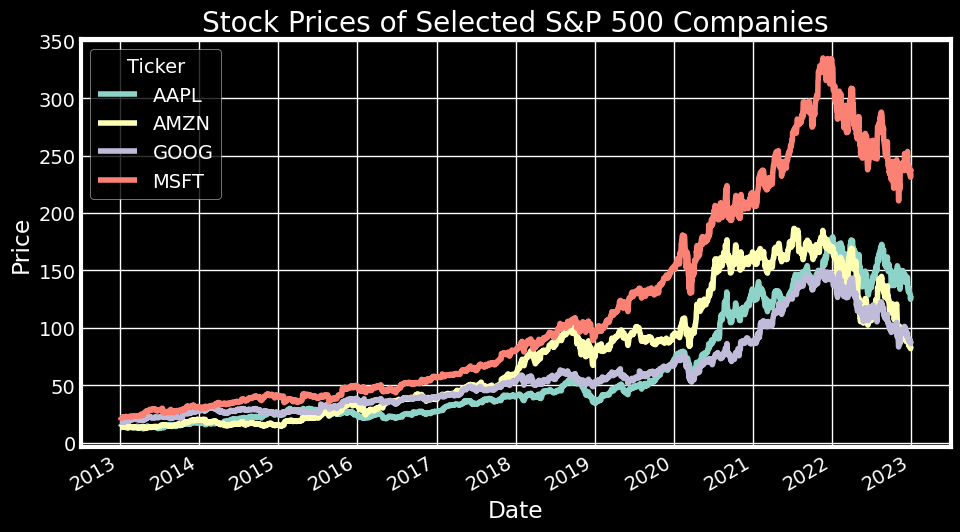

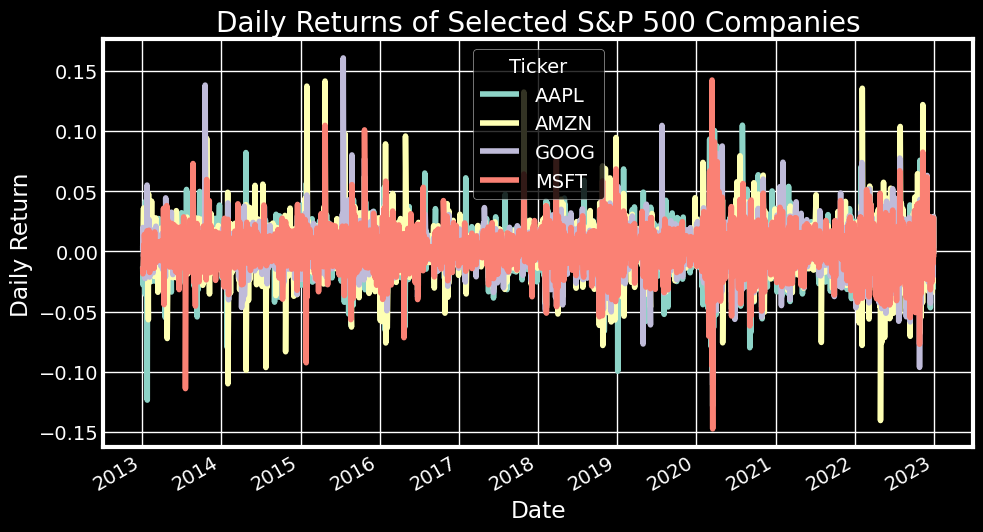

In [ ]:
#Visualizing Stock Performance

import matplotlib.pyplot as plt
import seaborn as sns

# Plot historical adjusted close prices
adj_close.plot(figsize=(10, 6), title='Stock Prices of Selected S&P 500 Companies')
plt.ylabel('Price')
plt.show()

# Plot daily returns for each stock
daily_returns.plot(figsize=(10, 6), title='Daily Returns of Selected S&P 500 Companies')
plt.ylabel('Daily Return')
plt.show()

In [ ]:
#Stock Volatility Analysis
#calculate the rolling volatility (30-day rolling window)
rolling_volatility = daily_returns.rolling(window=30).std()

#Plor rolling volatility for the stocks
rolling_volatility.plot(figsize=(10, 6), title='Rolling Volatility of Selected S&P 500 Stocks')
plt.ylabel('Volatility')
plt.show()

Macroeconomic Correlation Analysis

In [ ]:
import seaborn as sns

corr_matrix = data_merged.corr()

#Visualize correlation using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected S&P 500 Stocks and Macroeconomic Indicators')
plt.show()

Looks like theres a higher interest rate for Apple stocks and Microsoft has a comparatively higher GDP compared to Google, Amazon, Apple

### Statistical and Regression Analysis

Perform Regression analysis and see how GDP aand interest rates influence stock returns

In [ ]:
import statsmodels.api as sm

# Define independent (X) and dependent (Y) variables for regression analysis
X = data_merged[['GDP', 'interest_rate']]  # Macroeconomic factors
Y = data_merged['AAPL']  # Dependent variable (stock returns for Apple in this case)

# Add a constant term for the regression intercept
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())

### Portfolio Optimization

Implement a simple potfolio optimization based on mean-variance analysis

In [ ]:
import numpy as np
import cvxpy as cp

#Expected returns and covariance matrix of stock returns
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

#Number of stocks
n = len(mean_returns)

#Decision variables
weights = cp.Variable(n)

#Define portfolio's expected return and volatilty
portfolio_return = mean_returns.T @ weights
portfolio_volatility = cp.quad_form(weights, cov_matrix)

#Objective Maximize Sharpe'ratio (Return/Volaltility)
objective = cp.Maximize(portfolio_return / cp.sqrt(portfolio_volatility))

#Constraints: Weights must be sum to 1
constraints = [cp.sum(weights) == 1, weights >= 0]

#Portfolio optimization problem
problem = cp.Problem(objective, constraints)

#Solve the optimization problem
problem.solve()
print("Optimal Portfolio WEights:", weights.value)

In [ ]:
# Plot the optimal portfolio allocation
plt.figure(figsize=(10, 6))
plt.bar(daily_returns.columns, weights.value)
plt.title('Optimal Portfolio Allocation Based on Mean-Variance Optimization')
plt.ylabel('Weight')
plt.show()